# EDA: NeurIPS 2024 - Predict New Medicines with BELKA

## Librerías

In [2]:
import numpy as np
import warnings
import mglearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest,chi2
warnings.filterwarnings("ignore")

## Análisis exploratorio de la base de datos

Los medicamentos con moléculas reducidas son compuestos químicos que interactúan con las proteínas celulares. Estos regulan la actividad de las proteínas al inhibir su función, lo cual puede minimizar significativamente el impacto patológico de estas. En la actualidad, la identificación de moléculas candidatas necesita un enfoque bastante complejo, ya que requiere llevar a cabo una síntesis individual seguida de pruebas para confirmar su interacción con la proteína objetivo.  

Aunque `la Administración de Alimentos y Medicamentos de Estados Unidos (FDA)` ha autorizado aproximadamente 2000 nuevas entidades moleculares, el número potencial de moléculas con propiedades farmacológicas efectivas es extremadamente alto, estimado en aproximadamente 10^60. Esta magnitud presenta un desafío considerable, ya que el proceso físico de búsqueda resulta prácticamente inviable para explorar todo este vasto espacio químico. 



En esta ocasión, trabajaremos con datos proporcionados por `Leash Biosciences`, los cuales están representados mediante una clasificación binaria que indica si una molécula pequeña es un aglutinante de una de las tres proteínas o no. Estos datos se recopilaron utilizando la tecnología de la  biblioteca química codificada por ADN (DEL), generando así el conjunto de datos `Big Encoded Library for Chemical Assessment (BELKA)`.

Para este ejercicio, vamos a trabajar con dos bases de datos: `train` y `test` relacionadas con el problema a predecir.

Contamos con diferentes tipos de moléculas que vamos a estudiar con el fin de saber si esta está adherida o no a los 3 tipos de proteína de interés. Estas son:

* `EPHX2 (sEH)`: **epóxido hidrolasa 2 (EPHX2)**, cuyo producto proteico es conocido como **epóxido hidrolasa soluble (sEH)**, es un objetivo farmacológico prometedor para tratar la hipertensión arterial y frenar la progresión de la diabetes.


* `BRD4`: **bromodomain 4 (BRD4)**, codificado por el locus BRD4, produce una proteína que se une a histonas, proteínas en el núcleo que regulan la transcripción del ADN. Al influir en la expresión genética, juegan un papel clave en la progresión del cáncer, y se han desarrollado varios fármacos que inhiben su actividad.

* `ALB (HSA)`: `albúmina sérica (ALB)`, codificada por el locus ALB y también conocida como `HSA (albúmina sérica humana)`, es la proteína más abundante en la sangre. Su función principal es mantener la presión osmótica y transportar diversos ligandos, como hormonas y ácidos grasos.

Veamos una descripción de las variables con las que estamos trabajando:

* `id`: identificador único.
* `buildingblock1_smiles `: la estructura, en SMILES, del primer bloque de construcción.
* `buildingblock2_smiles`: la estructura, en SMILES, del segundo bloque de construcción.
* `buildingblock3_smiles`: la estructura, en SMILES, del tercer bloque de construcción.
* `molecule_smiles`: la estructura de la molécula completamente ensamblada, en SMILES. Esto incluye los tres bloques de construcción y el núcleo de triazina. Es el ID de la molécula.
* `binds`: unión molécula-proteína. 0 - No, 1 - Sí

## Base de datos de entrenamiento

In [4]:
data_train = pd.read_csv("C:/Users/valcd/Downloads/leash-BELKA/train.csv")

El conjunto de datos de entrenamiento, `train`, cuenta con un total de 295246830 observaciones y con 7 variables, las cuales ya fueron descritas.


In [4]:
data_train.shape

(295246830, 7)

In [4]:
data_train.head(15)

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name,binds
0,0,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.Br.NCC1CCCN1c1cccnn1,C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H]...,BRD4,0
1,1,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.Br.NCC1CCCN1c1cccnn1,C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H]...,HSA,0
2,2,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.Br.NCC1CCCN1c1cccnn1,C#CCOc1ccc(CNc2nc(NCC3CCCN3c3cccnn3)nc(N[C@@H]...,sEH,0
3,3,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.NCc1cccc(Br)n1,C#CCOc1ccc(CNc2nc(NCc3cccc(Br)n3)nc(N[C@@H](CC...,BRD4,0
4,4,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.NCc1cccc(Br)n1,C#CCOc1ccc(CNc2nc(NCc3cccc(Br)n3)nc(N[C@@H](CC...,HSA,0
5,5,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,Br.NCc1cccc(Br)n1,C#CCOc1ccc(CNc2nc(NCc3cccc(Br)n3)nc(N[C@@H](CC...,sEH,0
6,6,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,C#CCOc1ccc(CN)cc1.Cl,C#CCOc1ccc(CNc2nc(NCc3ccc(OCC#C)cc3)nc(N[C@@H]...,BRD4,0
7,7,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,C#CCOc1ccc(CN)cc1.Cl,C#CCOc1ccc(CNc2nc(NCc3ccc(OCC#C)cc3)nc(N[C@@H]...,HSA,0
8,8,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,C#CCOc1ccc(CN)cc1.Cl,C#CCOc1ccc(CNc2nc(NCc3ccc(OCC#C)cc3)nc(N[C@@H]...,sEH,0
9,9,C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,C#CCOc1ccc(CN)cc1.Cl,C=C(C)C(=O)NCCN.Cl,C#CCOc1ccc(CNc2nc(NCCNC(=O)C(=C)C)nc(N[C@@H](C...,BRD4,0


In [6]:
data_train.tail(15)

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name,binds
295246815,295246815,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1noc2ccc(F)cc12,Nc1ncnc2c1ncn2C1CCCCO1,[N-]=[N+]=NCCC[C@H](Nc1nc(Nc2noc3ccc(F)cc23)nc...,BRD4,0
295246816,295246816,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1noc2ccc(F)cc12,Nc1ncnc2c1ncn2C1CCCCO1,[N-]=[N+]=NCCC[C@H](Nc1nc(Nc2noc3ccc(F)cc23)nc...,HSA,0
295246817,295246817,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1noc2ccc(F)cc12,Nc1ncnc2c1ncn2C1CCCCO1,[N-]=[N+]=NCCC[C@H](Nc1nc(Nc2noc3ccc(F)cc23)nc...,sEH,0
295246818,295246818,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1noc2ccc(F)cc12,Nc1nnc(S)s1,[N-]=[N+]=NCCC[C@H](Nc1nc(Nc2nnc(S)s2)nc(Nc2no...,BRD4,0
295246819,295246819,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1noc2ccc(F)cc12,Nc1nnc(S)s1,[N-]=[N+]=NCCC[C@H](Nc1nc(Nc2nnc(S)s2)nc(Nc2no...,HSA,0
295246820,295246820,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1noc2ccc(F)cc12,Nc1nnc(S)s1,[N-]=[N+]=NCCC[C@H](Nc1nc(Nc2nnc(S)s2)nc(Nc2no...,sEH,0
295246821,295246821,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1noc2ccc(F)cc12,Nc1nncs1,[N-]=[N+]=NCCC[C@H](Nc1nc(Nc2nncs2)nc(Nc2noc3c...,BRD4,0
295246822,295246822,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1noc2ccc(F)cc12,Nc1nncs1,[N-]=[N+]=NCCC[C@H](Nc1nc(Nc2nncs2)nc(Nc2noc3c...,HSA,0
295246823,295246823,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1noc2ccc(F)cc12,Nc1nncs1,[N-]=[N+]=NCCC[C@H](Nc1nc(Nc2nncs2)nc(Nc2noc3c...,sEH,0
295246824,295246824,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1noc2ccc(F)cc12,Nc1nnn[nH]1,[N-]=[N+]=NCCC[C@H](Nc1nc(Nc2nnn[nH]2)nc(Nc2no...,BRD4,0


Al visualizar las primeras y últimas 15 observaciones, respectivamente, podemos darnos cuenta de que se sigue un patrón en cuanto a los bloques y las moléculas. Dicho patrón es que el valor de estas 4 variables, se repite 3 veces dado que se realiza la comparación con cada una de las 3 proteínas.

Ahora, analicemos más de cerca las variables de nuestro conjunto de datos.

Primero, estudiemos la distribución de nuestra variable objetivo `binds`, la cual como ya se mencionó, indica si la molécula se adhirió o no a la proteína.

In [4]:
labels = (data_train['binds'].value_counts())
labels

binds
0    293656924
1      1589906
Name: count, dtype: int64

In [8]:
prctj = data_train['binds'].value_counts(normalize=True) * 100
prctj

binds
0    99.461499
1     0.538501
Name: proportion, dtype: float64

In [9]:
proteinas = data_train.groupby('protein_name')['binds'].value_counts(normalize=True).unstack().reset_index(drop=True)

In [10]:
proteinas

binds,0,1
0,0.995357,0.004643
1,0.995850,0.004150
2,0.992638,0.007362


Nada más con estos cálculos podemos afirmar que la base de datos está **muy** desbalanceada.

Veamos esto gráficamente.

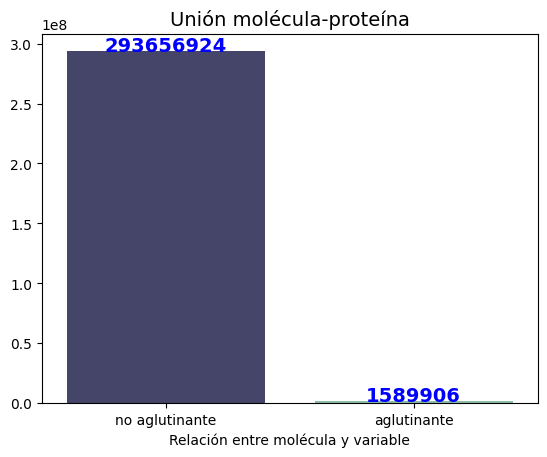

In [5]:
ax = sns.countplot(x = 'binds', data = data_train, palette=["#3f3e6fd1", "#85c6a9"])
plt.xticks(np.arange(2), ['no aglutinante', 'aglutinante'])
plt.title('Unión molécula-proteína',fontsize= 14)
plt.xlabel('Relación entre molécula y variable')
plt.ylabel('')

for i, v in enumerate(labels):
    ax.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'b', fontweight = 'bold')

En efecto, el gráfico coincide con los valores obtenidos, mostrando que la frecuencia de moléculas **no aglutinantes** es significativamente superior a la de las **aglutinantes**, pues el primer grupo representa el 99% de las observaciones, mientras que el segundo solo un 0.05%.

Es evidente el desequilibrio significativo de `binds`. Con esto se confirma que la mayoría de las observaciones corresponden a moléculas que no están unidas a una proteína.

Continuemos con las demás variables. 

Para estas vamos a calcular la cantidad de valores únicos que hay en cada columna.

* buildingblock1_smiles	

In [12]:
bloque1 = data_train['buildingblock1_smiles'].nunique()
bloque1

271

* buildingblock2_smiles	

In [13]:
bloque2 = data_train['buildingblock2_smiles'].nunique()
bloque2

693

* buildingblock3_smiles

In [14]:
bloque3 = data_train['buildingblock3_smiles'].nunique()
bloque3

872

* molecule_smiles

In [15]:
moleculas = data_train['molecule_smiles'].nunique()
moleculas

98415610

In [16]:
import plotly
import plotly.graph_objects as go

# Datos de las variables
header = ['buildingblock1_smiles', 'buildingblock2_smiles', 'buildingblock3_smiles', 'molecule_smiles']
values = [[bloque1], [bloque2], [bloque3], [moleculas]]

# Crear tabla con plotly
fig = go.Figure(data=[go.Table(header=dict(values=header),
                               cells=dict(values=values))])

# Mostrar la tabla
fig.show()

Podemos observar que la cantidad de moléculas con las que trabajamos es bastante superior comparado con la cantidad de valores únicos total de bloques, esto quiere decir que existen muchos más tipos de moléculas diferentes entre sí que de bloques.

Ahora, veamos si existen valores faltantes en este conjunto de datos.

In [25]:
cantidad_na = data_train.isna().sum()

for columna in cantidad_na.index:
    print(f"{columna}: {cantidad_na[columna]} NA's")

id: 0 NA's
buildingblock1_smiles: 0 NA's
buildingblock2_smiles: 0 NA's
buildingblock3_smiles: 0 NA's
molecule_smiles: 0 NA's
protein_name: 0 NA's
binds: 0 NA's


In [18]:
(data_train.isnull().sum() * 100 /len(data_train)).map('{:.2f} %'.format)

id                       0.00 %
buildingblock1_smiles    0.00 %
buildingblock2_smiles    0.00 %
buildingblock3_smiles    0.00 %
molecule_smiles          0.00 %
protein_name             0.00 %
binds                    0.00 %
dtype: object

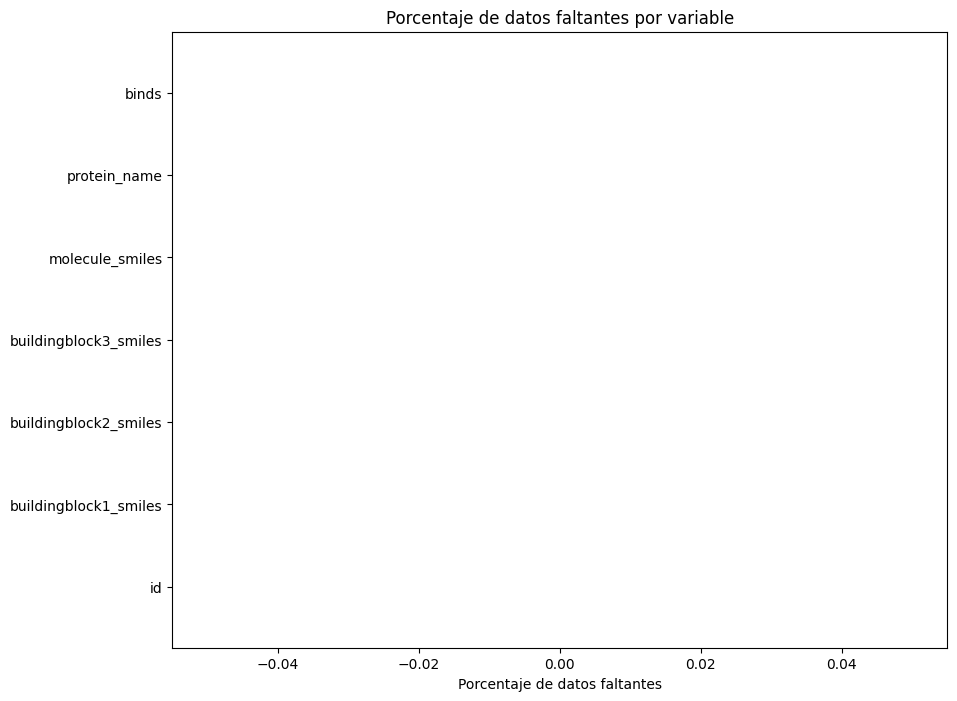

In [19]:
porcentaje_NA = data_train.isna().mean() * 100

data_faltante = pd.DataFrame({'column': porcentaje_NA.index, 'percent_missing': porcentaje_NA.values})

data_faltante = data_faltante.sort_values(by='percent_missing')

plt.figure(figsize=(10, 8))
plt.barh(data_faltante['column'], data_faltante['percent_missing'], color='lightblue')
plt.xlabel('Porcentaje de datos faltantes')
plt.title('Porcentaje de datos faltantes por variable')
plt.show()

Es decir, `train` no cuenta con observaciones de tipo NA. 
Esto es beneficioso para predecir de manera más precisa nuestro modelo.


Antes de seguir con el ejercicio, se va a realizar la siguiente aclaración:

Como ya se mencionó con anterioridad, esta base de datos contiene más de 200M de observaciones. En un principio, se intentó de diferentes maneras trabajar con este total, sin embargo, fue bastante complejo pues nuestra computadora con RAM de 16gb no soportaba en muchas ocasiones el peso de esta base de datos y de los diferentes procesos gastando mucho tiempo computacional y espacio de la RAM, lo cual terminaba relentizando y, a su vez, haciendo mucho más compleja la realización de esta actividad. Como primera solución, compramos Google Colab Pro, no obstante, esto no nos funcionó porque la RAM tampoco era suficiente para este conjunto.

Es por esta razón, que decidimos trabajar con la base de datos, filtrándola según el tipo de proteína y, además, reduciendo el número de observaciones a 100000 dado que por las circunstancias, se nos imposibilitaba trabajar con la base original.


En este orden de ideas, realizaremos las respectivas filtraciones trabajando cada conjunto de manera independiente para realizar sus respectivas predicciones.

In [7]:
data_sEH = data_train[data_train['protein_name'] == 'sEH']

In [3]:
data_BRD4 = data_train[data_train['protein_name'] == 'BRD4']

In [5]:
data_HSA = data_train[data_train['protein_name'] == 'HSA']

### Filtración: proteína EPHX2 - (sEH)

In [8]:
datatrain_sEH,_= train_test_split( data_sEH, train_size = 100000,  stratify = data_sEH['binds'], random_state=21)

In [37]:
datatrain_sEH.shape      

(100000, 7)

Ahora, calculemos la cantidad de valores únicos por variable.

In [30]:
bloque1_seh = data_sEH['buildingblock1_smiles'].nunique()
bloque1_seh

271

In [31]:
bloque2_seh = data_sEH['buildingblock2_smiles'].nunique()
bloque2_seh

693

In [32]:
bloque3_seh = data_sEH['buildingblock3_smiles'].nunique()
bloque3_seh

872

In [33]:
moleculas_seh = data_sEH['molecule_smiles'].nunique()
moleculas_seh

98415610

In [34]:
import plotly
import plotly.graph_objects as go

# Datos de las variables
header = ['buildingblock1_smiles', 'buildingblock2_smiles', 'buildingblock3_smiles', 'molecule_smiles']
values = [[bloque1_seh], [bloque2_seh], [bloque3_seh], [moleculas_seh]]

# Crear tabla con plotly
fig = go.Figure(data=[go.Table(header=dict(values=header),
                               cells=dict(values=values))])

# Mostrar la tabla
fig.show()

In [10]:
proteina_seh = datatrain_sEH.groupby('protein_name')['binds'].value_counts(normalize=True).unstack().reset_index(drop=True)
proteina_seh

binds,0,1
0,0.99264,0.00736


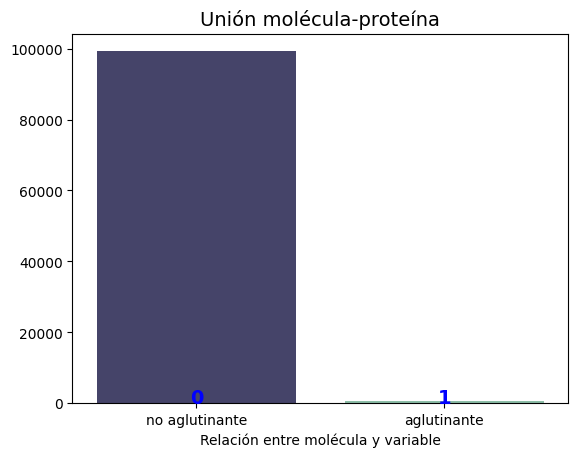

In [11]:
ax = sns.countplot(x = 'binds', data = datatrain_sEH, palette=["#3f3e6fd1", "#85c6a9"])
plt.xticks(np.arange(2), ['no aglutinante', 'aglutinante'])
plt.title('Unión molécula-proteína',fontsize= 14)
plt.xlabel('Relación entre molécula y variable')
plt.ylabel('')

for i, v in enumerate(proteina_seh):
    ax.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'b', fontweight = 'bold')

***datatrain_sEH*** es el dataframe creado a partir de la filtración con la proteína `sEH`. Como se mencionó antes, dada la gran cantidad de datos, se decidió tomar 100000 observaciones aleatorias que representan al conjunto de entrenamiento.
Esto lo podemos observar pues la cantidad de valores únicos coincide con la de la base de datos original, al igual que la distribución de la variable binaria `binds`.

Comprobemos que no hayan valores NA tal como en la base de entrenamiento.

In [12]:
cantidad_na = datatrain_sEH.isna().sum()

for columna in cantidad_na.index:
    print(f"{columna}: {cantidad_na[columna]} NA's")

id: 0 NA's
buildingblock1_smiles: 0 NA's
buildingblock2_smiles: 0 NA's
buildingblock3_smiles: 0 NA's
molecule_smiles: 0 NA's
protein_name: 0 NA's
binds: 0 NA's


Ahora, con ayuda de `OneHotEncoder` se codificará la base de datos que contiene las observaciones de la proteína **sEH**.

#### Codificación: OneHotEncoder

In [14]:
datatrain_seh = datatrain_sEH.reset_index()

Cabe resaltar que la variable `molecules_smiles` puede ser interpretada como un ID, pues cada valor en esta variable corresponde a un nombre que identifica de manera única a una molécula. Dado que actúa únicamente como un identificador y no proporciona información relevante para nuestro modelo, no la vamos a incluir en la codificación. 

In [15]:
catcol_seh = ['protein_name', 'buildingblock1_smiles', 'buildingblock2_smiles', 'buildingblock3_smiles']
encoder_seh =   OneHotEncoder(sparse_output=False)
encoded_seh = encoder_seh.fit_transform(datatrain_seh[catcol_seh])
data_encodedseh = pd.DataFrame(encoded_seh, columns=encoder_seh.get_feature_names_out(catcol_seh))
datatrainseh = pd.concat([datatrain_seh,data_encodedseh], axis = 1)
datatrainseh= datatrainseh.drop(catcol_seh,axis=1) 

In [40]:
datatrainseh.head(15)

,index,id,molecule_smiles,binds,protein_name_sEH,buildingblock1_smiles_C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@](C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,...,buildingblock3_smiles_Nc1ncnc(=O)[nH]1,buildingblock3_smiles_Nc1ncnc(Cl)c1Cl,buildingblock3_smiles_Nc1ncnc2[nH]cnc12,buildingblock3_smiles_Nc1ncnc2[nH]ncc12,buildingblock3_smiles_Nc1ncnc2c1ncn2C1CCCCO1,buildingblock3_smiles_Nc1ncncc1Br,buildingblock3_smiles_Nc1nnc(S)s1,buildingblock3_smiles_Nc1nncs1,buildingblock3_smiles_Nc1nnn[nH]1,buildingblock3_smiles_Nc1noc2ccc(F)cc12
0,268370342,268370342,Cc1cc(Nc2nc(Nc3cc(Cl)c(F)c(Cl)c3)nc(N[C@H](CC(...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10026182,10026182,C=CC[C@H](Nc1nc(NCC2(COC)CCCCC2)nc(Nc2ccc(F)c(...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23512220,23512220,CCS(=O)(=O)c1cc(C(=O)N[Dy])c(OC)cc1Nc1nc(NC[C@...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,61878314,61878314,Cc1ccccc1[C@@H](CC(=O)N[Dy])Nc1nc(NCc2nc3c(s2)...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,253580711,253580711,CC1(C)NC(=O)N(CCCNc2nc(NCc3cccnc3)nc(N[C@@H](C...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,47632394,47632394,Cc1cc(Br)c(C(=O)N[Dy])cc1Nc1nc(NCCc2ccncc2F)nc...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,214744424,214744424,CCOC(=O)c1ncccc1Nc1nc(Nc2cccc([N+](=O)[O-])c2C...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,42487106,42487106,C#CCOc1ccc(CNc2nc(NCC3CCCn4ccnc43)nc(Nc3cnc(SC...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,149389373,149389373,COc1ccc(CNc2nc(NCC3CCC(C(=O)N(C)C)O3)nc(Nc3c(F...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,142007936,142007936,Cc1cc(Nc2nc(Nc3nc(-c4cccc([N+](=O)[O-])c4)cs3)...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
datatrainseh.tail(15)

,index,id,molecule_smiles,binds,protein_name_sEH,buildingblock1_smiles_C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@](C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,...,buildingblock3_smiles_Nc1ncnc(=O)[nH]1,buildingblock3_smiles_Nc1ncnc(Cl)c1Cl,buildingblock3_smiles_Nc1ncnc2[nH]cnc12,buildingblock3_smiles_Nc1ncnc2[nH]ncc12,buildingblock3_smiles_Nc1ncnc2c1ncn2C1CCCCO1,buildingblock3_smiles_Nc1ncncc1Br,buildingblock3_smiles_Nc1nnc(S)s1,buildingblock3_smiles_Nc1nncs1,buildingblock3_smiles_Nc1nnn[nH]1,buildingblock3_smiles_Nc1noc2ccc(F)cc12
99985,110594819,110594819,C=CCOC(C)CNc1nc(NCC2CC3(C2)CC3(F)F)nc(N[C@@H]2...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99986,206817857,206817857,Cn1ccnc1Cn1c(CCCNc2nc(Nc3ccc(F)c(Cl)c3)nc(Nc3c...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99987,95503043,95503043,O=C1CSC(Nc2nc(Nc3cnc(Cl)c(Cl)c3)nc(N[C@@H](Cc3...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99988,266273570,266273570,Cc1nn(C)c2ncc(CNc3nc(NCc4ccc5scnc5c4)nc(N[C@H]...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99989,56614190,56614190,CNC(=O)COCCNc1nc(Nc2ncc(Cl)c(Cl)n2)nc(NC(CC(=O...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99990,50279990,50279990,CNC(=O)COCCNc1nc(NCC2CCC(C(=O)N(C)C)O2)nc(Nc2c...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99991,160111940,160111940,COc1ccc(Nc2nc(Nc3cc(Br)cc(C(=O)N[Dy])c3)nc(Nc3...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99992,291714953,291714953,CC(O)(CNc1nc(NCc2cccnc2)nc(N2CCOC[C@@H]2C(=O)N...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99993,68271803,68271803,CN(C)c1ncccc1CNc1nc(NC2=NC(=O)CS2)nc(Nc2ccc(C#...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99994,20301830,20301830,CCC(C)C(Nc1nc(NCC(c2cncn2C)N2CCCC2)nc(Nc2ccc(C...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


En efecto, observamos que se realizó la codificación de nuestro dataset y ya está listo para proceder a realizar la evaluación de multicolinealidad con `Chi-cuadrado`.

#### Multicolinealidad: Chi-cuadrado

En este apartado, nuestro objetivo es identificar cuáles columnas tienen un alto nivel de correlación entre sí para eliminar algunas de ellas.

Para esto, podemos usar la prueba `Chi-cuadrado` con la función `chi2_contingency()`, que nos ayuda a evaluar la relación entre variables categróricas y, posteriormente, eliminar columnas de manera manual. Sin embargo, en las aplicaciones de Machine Learning, existe un método llamado `SelectKBest`, el cual realiza ambos procesos en una misma función. Utilizando este método basándose en `chi2`, podemos seleccionar las características más relevantes (variables más asociadas y que mejor predicen a la objetivo) y eliminar automáticamente las menos importantes en la base de datos para realizar un mejor modelo.

Lo primero que haremos será eliminar la columna `molecule_smiles` de nuestro conjunto de datos. Como se mencionó anteriormente, esta columna no se codificó ya que no es relevante para nuestro estudio, porque solo representa un identificador único para cada molécula, es decir, el nombre de estas.

In [16]:
datatrainseh = datatrainseh.drop(columns=['molecule_smiles'])

In [12]:
datatrainseh.head()

,index,id,binds,protein_name_sEH,buildingblock1_smiles_C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@](C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC(CC=C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,...,buildingblock3_smiles_Nc1ncnc(=O)[nH]1,buildingblock3_smiles_Nc1ncnc(Cl)c1Cl,buildingblock3_smiles_Nc1ncnc2[nH]cnc12,buildingblock3_smiles_Nc1ncnc2[nH]ncc12,buildingblock3_smiles_Nc1ncnc2c1ncn2C1CCCCO1,buildingblock3_smiles_Nc1ncncc1Br,buildingblock3_smiles_Nc1nnc(S)s1,buildingblock3_smiles_Nc1nncs1,buildingblock3_smiles_Nc1nnn[nH]1,buildingblock3_smiles_Nc1noc2ccc(F)cc12
0,268370342,268370342,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10026182,10026182,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23512220,23512220,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,61878314,61878314,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,253580711,253580711,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ahora, procederemos a realizar la evaluación de multicolinealidad y eliminación de columnas no relevantes.

Nuestro criterio de evaluación para la relevancia de las variables se basa en seleccionar las 150 características que muestran una fuerte asociación con nuestra variable objetivo basado en los resultados arrojados por la función `SelectKBest` y la prueba `chi2`.

In [18]:
unionseh = datatrainseh['binds']

bestseh = SelectKBest(score_func = chi2, k = 150)  
X_seh = bestseh.fit_transform(datatrainseh, unionseh)

caracselec_seh = bestseh.get_support(indices=True) 
colineal_seh = datatrainseh.iloc[:, caracselec_seh]

In [16]:
colineal_seh.head()

,index,id,binds,buildingblock1_smiles_C#CC[C@@](C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_CC(C)CC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_COc1cc(C(=O)O)c(N)cc1NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_Cc1cc(Br)c(C(=O)O)cc1NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(NCC1CCC(C(=O)O)CC1)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)OCC1c2ccccc2-c2ccccc21,...,buildingblock3_smiles_Nc1cc(Cl)c([N+](=O)[O-])cn1,buildingblock3_smiles_Nc1ccc(Cl)nc1,buildingblock3_smiles_Nc1ccc(Cl)nc1Cl,buildingblock3_smiles_Nc1ccc(F)c([N+](=O)[O-])c1,buildingblock3_smiles_Nc1ccc(N2CCC=C(N3CCOCC3)C2=O)cc1,buildingblock3_smiles_Nc1ccc(OC(F)F)cc1,buildingblock3_smiles_Nc1ccc2ncoc2c1,buildingblock3_smiles_Nc1nc(-c2ccc(Cl)c(Cl)c2)cs1,buildingblock3_smiles_Nc1ncc(Cl)cc1F,buildingblock3_smiles_Nc1nncs1
0,268370342,268370342,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10026182,10026182,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23512220,23512220,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,61878314,61878314,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,253580711,253580711,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Finalmente nos quedaremos con `colineal_seh` como base de datos de entrenamiento para la realización del modelo.

In [19]:
colineal_seh.to_csv('datatrainsEH.csv', index=False)

### Filtración: proteína BRD4

In [4]:
datatrain_BRD4,_= train_test_split(data_BRD4, train_size = 100000,  stratify = data_BRD4['binds'], random_state=21)

In [7]:
datatrain_BRD4.shape    

(100000, 7)

Calculemos el total de valores únicos por variable y la distribución de `binds`.

In [7]:
bloque1_BRD4 = data_BRD4['buildingblock1_smiles'].nunique()
bloque1_BRD4

271

In [8]:
bloque2_BRD4 = data_BRD4['buildingblock2_smiles'].nunique()
bloque2_BRD4

693

In [9]:
bloque3_BRD4 = data_BRD4['buildingblock3_smiles'].nunique()
bloque3_BRD4

872

In [5]:
moleculas_BRD4 = data_BRD4['molecule_smiles'].nunique()
moleculas_BRD4

98415610

In [10]:
import plotly
import plotly.graph_objects as go

# Datos de las variables
header = ['buildingblock1_smiles', 'buildingblock2_smiles', 'buildingblock3_smiles', 'molecule_smiles']
values = [[bloque1_BRD4], [bloque2_BRD4], [bloque3_BRD4], [moleculas_BRD4]]

# Crear tabla con plotly
fig = go.Figure(data=[go.Table(header=dict(values=header),
                               cells=dict(values=values))])

# Mostrar la tabla
fig.show()

In [11]:
proteina_BRD4 = datatrain_BRD4.groupby('protein_name')['binds'].value_counts(normalize=True).unstack().reset_index(drop=True)
proteina_BRD4

binds,0,1
0,0.99536,0.00464


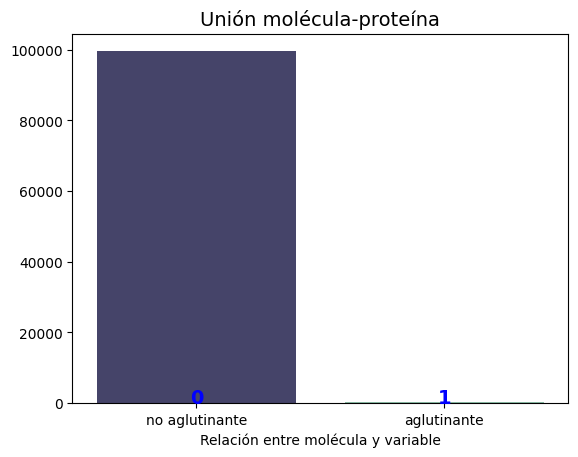

In [14]:
ax = sns.countplot(x = 'binds', data = datatrain_BRD4, palette=["#3f3e6fd1", "#85c6a9"])
plt.xticks(np.arange(2), ['no aglutinante', 'aglutinante'])
plt.title('Unión molécula-proteína',fontsize= 14)
plt.xlabel('Relación entre molécula y variable')
plt.ylabel('')

for i, v in enumerate(proteina_BRD4):
    ax.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'b', fontweight = 'bold')

***datatrain_BRD4*** es el dataframe creado a partir de la filtración con la proteína `BRD4`. Al igual que con la proteína, `sEH`, se tomaron 100000 observaciones aleatorias que representan al conjunto de entrenamiento.
Esto lo podemos observar pues la cantidad de valores únicos coincide con la de la base de datos original, al igual que la distribución de la variable binaria `binds`.

Comprobemos que no hayan valores NA tal como en la base de entrenamiento.

In [24]:
cantidad_na = datatrain_BRD4.isna().sum()

for columna in cantidad_na.index:
    print(f"{columna}: {cantidad_na[columna]} NA's")

id: 0 NA's
buildingblock1_smiles: 0 NA's
buildingblock2_smiles: 0 NA's
buildingblock3_smiles: 0 NA's
molecule_smiles: 0 NA's
protein_name: 0 NA's
binds: 0 NA's


Ahora, con ayuda de `OneHotEncoder` se codificará la base de datos que contiene las observaciones de la proteína **BRD4**.

#### Codificación: OneHotEncoder

In [15]:
datatrain_brd4 = datatrain_BRD4.reset_index()

Nuevamente dejamos de lado a la variable `molecule_smiles`.

In [16]:
catcol_brd4 = ['protein_name', 'buildingblock1_smiles', 'buildingblock2_smiles', 'buildingblock3_smiles']
encoder_brd4 =   OneHotEncoder(sparse_output=False)
encoded_brd4 = encoder_brd4.fit_transform(datatrain_brd4[catcol_brd4])
data_encodedbrd4 = pd.DataFrame(encoded_brd4, columns=encoder_brd4.get_feature_names_out(catcol_brd4))
datatrainbrd4 = pd.concat([datatrain_brd4,data_encodedbrd4], axis = 1)
datatrainbrd4 = datatrainbrd4.drop(catcol_brd4,axis=1) 

In [17]:
datatrainbrd4.head(15)

,index,id,molecule_smiles,binds,protein_name_BRD4,buildingblock1_smiles_C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@](C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,...,buildingblock3_smiles_Nc1ncnc(=O)[nH]1,buildingblock3_smiles_Nc1ncnc(Cl)c1Cl,buildingblock3_smiles_Nc1ncnc2[nH]cnc12,buildingblock3_smiles_Nc1ncnc2[nH]ncc12,buildingblock3_smiles_Nc1ncnc2c1ncn2C1CCCCO1,buildingblock3_smiles_Nc1ncncc1Br,buildingblock3_smiles_Nc1nnc(S)s1,buildingblock3_smiles_Nc1nncs1,buildingblock3_smiles_Nc1nnn[nH]1,buildingblock3_smiles_Nc1noc2ccc(F)cc12
0,30461271,30461271,COc1cc(C(=O)N[Dy])c(N)cc1Nc1nc(NCc2c(C)sc(C)c2...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,259257822,259257822,O=C(C[C@@H](Nc1nc(Nc2ccc3c(c2)COC3=O)nc(Nc2ncc...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,101635230,101635230,CS(=O)CCCCNc1nc(NC[C@H]2CC[C@H](C(N)=O)CC2)nc(...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19527021,19527021,CC(OC(C)(C)C)C(Nc1nc(Nc2ccnc(Cl)c2)nc(Nc2ccc(=...,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,187891824,187891824,O=C(N[Dy])c1ccc(Nc2nc(NCc3ccc[n+]([O-])c3)nc(N...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,68837628,68837628,COC(=O)c1nc(Cl)c(Cl)nc1Nc1nc(Nc2nccc3cccnc23)n...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,72906105,72906105,O=C(N[Dy])C(CC1CCCCC1)Nc1nc(Nc2cc(C(F)(F)F)cc(...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,152970567,152970567,COC1CCC(CCNc2nc(Nc3nnc(C)s3)nc(Nc3c(I)c(C(=O)O...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,180019656,180019656,COc1ccc(C)nc1CNc1nc(NCCOc2cccnc2)nc(Nc2ccc(Br)...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,243548469,243548469,O=C(C[C@@H](Cc1ccc(Br)cc1)Nc1nc(NCCCOc2cccc(F)...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
datatrainbrd4.tail(15)

,index,id,molecule_smiles,binds,protein_name_BRD4,buildingblock1_smiles_C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@](C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,...,buildingblock3_smiles_Nc1ncnc(=O)[nH]1,buildingblock3_smiles_Nc1ncnc(Cl)c1Cl,buildingblock3_smiles_Nc1ncnc2[nH]cnc12,buildingblock3_smiles_Nc1ncnc2[nH]ncc12,buildingblock3_smiles_Nc1ncnc2c1ncn2C1CCCCO1,buildingblock3_smiles_Nc1ncncc1Br,buildingblock3_smiles_Nc1nnc(S)s1,buildingblock3_smiles_Nc1nncs1,buildingblock3_smiles_Nc1nnn[nH]1,buildingblock3_smiles_Nc1noc2ccc(F)cc12
99985,96041997,96041997,COC(=O)c1cc(F)c(F)cc1Nc1nc(Nc2nc3c(s2)CN(C(=O)...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99986,40341102,40341102,COc1nccc(C(=O)N[Dy])c1Nc1nc(Nc2ccccc2N2CCN(C(=...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99987,141738897,141738897,CCOC(=O)c1csc(Nc2nc(Nc3nc(C(=O)OCC)cs3)nc(Nc3c...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99988,222486360,222486360,CCON(C)C(=O)CNc1nc(NCc2c(F)ccc(F)c2OC)nc(Nc2nc...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99989,88778394,88778394,N#Cc1ccc(CNc2nc(Nc3ccc(-c4ncc[nH]4)cc3)nc(N[C@...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99990,243886491,243886491,O=C(C[C@@H](Cc1ccc(Br)cc1)Nc1nc(Nc2ccc(OC(F)F)...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99991,54883578,54883578,Cc1ccc(C(=O)N[Dy])cc1Nc1nc(NCc2c(C)nn(-c3ccccc...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99992,265005852,265005852,COc1ccc(Nc2nc(NCC3CCN(c4ccncc4)CC3)nc(N[C@H](C...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99993,4882833,4882833,C#CC[C@H](Nc1nc(NCc2nnc3n2CCOCC3)nc(NCC(C)c2nc...,0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99994,16161186,16161186,CC(C)(C)OC(=O)N1C[C@@H](Nc2nc(NCc3cnc(N4CCOCC4...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Procederemos entonces a realizar la evaluación de la multicolinealidad.

#### Multicolinealidad: Chi-cuadrado

Eliminaremos primeramente la variable `molecule_smiles`.

In [19]:
datatrainbrd4 = datatrainbrd4.drop(columns=['molecule_smiles'])

In [20]:
datatrainbrd4

,index,id,binds,protein_name_BRD4,buildingblock1_smiles_C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@](C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC(CC=C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,...,buildingblock3_smiles_Nc1ncnc(=O)[nH]1,buildingblock3_smiles_Nc1ncnc(Cl)c1Cl,buildingblock3_smiles_Nc1ncnc2[nH]cnc12,buildingblock3_smiles_Nc1ncnc2[nH]ncc12,buildingblock3_smiles_Nc1ncnc2c1ncn2C1CCCCO1,buildingblock3_smiles_Nc1ncncc1Br,buildingblock3_smiles_Nc1nnc(S)s1,buildingblock3_smiles_Nc1nncs1,buildingblock3_smiles_Nc1nnn[nH]1,buildingblock3_smiles_Nc1noc2ccc(F)cc12
0,30461271,30461271,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,259257822,259257822,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,101635230,101635230,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19527021,19527021,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,187891824,187891824,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4810647,4810647,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,11532018,11532018,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,45267540,45267540,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,227278032,227278032,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Nuevamente haremos uso de la función `SelectKBest` con k= 150.

In [21]:
unionbrd4 = datatrainbrd4['binds']

bestbrd4 = SelectKBest(score_func = chi2, k = 150)  
X_brd4 = bestbrd4.fit_transform(datatrainbrd4, unionbrd4)

caracselec_brd4 = bestbrd4.get_support(indices=True) 
colineal_brd4 = datatrainbrd4.iloc[:, caracselec_brd4]

In [22]:
colineal_brd4

,index,id,binds,buildingblock1_smiles_CC(C)(C)OC(=O)CCC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_CC(C)(C)OCC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_CC(C)CC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_CC(OC(C)(C)C)C(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_CCC(C)C(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_CCCCC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_COc1ccc(C(=O)O)c(NC(=O)OCC2c3ccccc3-c3ccccc32)c1,...,buildingblock3_smiles_Nc1ccc(Cl)nc1,buildingblock3_smiles_Nc1ccc2c(c1)C(O)CCC2,buildingblock3_smiles_Nc1ccc2c(c1)CCC2=O,buildingblock3_smiles_Nc1ccc2c(c1)CCCC2=O,buildingblock3_smiles_Nc1ccc2c(c1)CNC2=O,buildingblock3_smiles_Nc1ccc2c(c1)COC2=O,buildingblock3_smiles_Nc1ccc2c(c1)OCO2,buildingblock3_smiles_Nc1nc2c(s1)CN(C(=O)OCc1ccccc1)CC2,buildingblock3_smiles_Nc1nc[nH]n1,buildingblock3_smiles_Nc1ncnc2[nH]ncc12
0,30461271,30461271,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,259257822,259257822,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,101635230,101635230,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19527021,19527021,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,187891824,187891824,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4810647,4810647,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,11532018,11532018,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,45267540,45267540,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,227278032,227278032,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Finalmente nos quedaremos con esta nueva base, `colineal_brd4`.

In [26]:
colineal_brd4.to_csv('datatrainbrd4.csv', index=False)

### Filtración: proteína HSA

In [6]:
datatrain_HSA,_= train_test_split(data_HSA, train_size = 100000,  stratify = data_HSA['binds'], random_state=21)

In [8]:
datatrain_HSA.shape

(100000, 7)

Ahora, encontremos la cantidad de valores únicos por variable al igual que la distribución de la objetivo.

In [9]:
bloque1_HSA = data_HSA['buildingblock1_smiles'].nunique()
bloque1_HSA

271

In [10]:
bloque2_HSA = data_HSA['buildingblock2_smiles'].nunique()
bloque2_HSA

693

In [11]:
bloque3_HSA = data_HSA['buildingblock3_smiles'].nunique()
bloque3_HSA

872

In [12]:
moleculas_HSA = data_HSA['molecule_smiles'].nunique()
moleculas_HSA

98415610

In [13]:
import plotly
import plotly.graph_objects as go

# Datos de las variables
header = ['buildingblock1_smiles', 'buildingblock2_smiles', 'buildingblock3_smiles', 'molecule_smiles']
values = [[bloque1_HSA], [bloque2_HSA], [bloque3_HSA], [moleculas_HSA]]

# Crear tabla con plotly
fig = go.Figure(data=[go.Table(header=dict(values=header),
                               cells=dict(values=values))])

# Mostrar la tabla
fig.show()

In [14]:
proteina_HSA = datatrain_HSA.groupby('protein_name')['binds'].value_counts(normalize=True).unstack().reset_index(drop=True)
proteina_HSA

binds,0,1
0,0.99585,0.00415


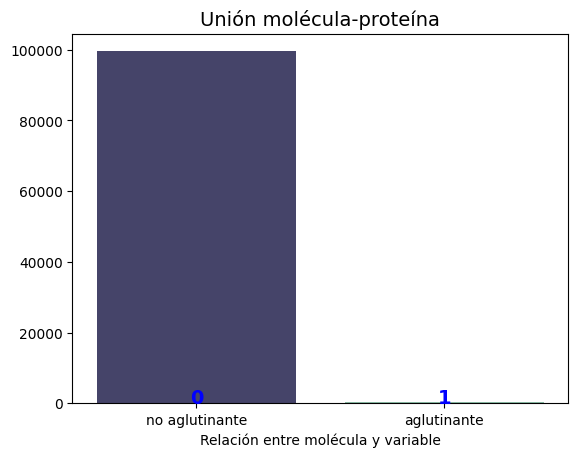

In [16]:
ax = sns.countplot(x = 'binds', data = datatrain_HSA, palette=["#3f3e6fd1", "#85c6a9"])
plt.xticks(np.arange(2), ['no aglutinante', 'aglutinante'])
plt.title('Unión molécula-proteína',fontsize= 14)
plt.xlabel('Relación entre molécula y variable')
plt.ylabel('')

for i, v in enumerate(proteina_HSA):
    ax.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'b', fontweight = 'bold')

***datatrain_HSA*** es el dataframe creado a partir de la filtración con la proteína `HSA`. Nuevamente se tomaron 100000 observaciones aleatorias que representan al conjunto de entrenamiento.
Esto lo podemos observar pues la cantidad de valores únicos coincide con la de la base de datos original, al igual que la distribución de la variable binaria `binds`.

Comprobemos que no hayan valores NA tal como en la base de entrenamiento.

In [17]:
cantidad_na = datatrain_HSA.isna().sum()

for columna in cantidad_na.index:
    print(f"{columna}: {cantidad_na[columna]} NA's")

id: 0 NA's
buildingblock1_smiles: 0 NA's
buildingblock2_smiles: 0 NA's
buildingblock3_smiles: 0 NA's
molecule_smiles: 0 NA's
protein_name: 0 NA's
binds: 0 NA's


Ahora, con ayuda de `OneHotEncoder` se codificará la base de datos que contiene las observaciones de la proteína **HSA**.

#### Codificación: OneHotEncoder

In [19]:
datatrain_hsa = datatrain_HSA.reset_index()

In [20]:
catcol_hsa = ['protein_name', 'buildingblock1_smiles', 'buildingblock2_smiles', 'buildingblock3_smiles']
encoder_hsa =   OneHotEncoder(sparse_output=False)
encoded_hsa = encoder_hsa.fit_transform(datatrain_hsa[catcol_hsa])
data_encodedhsa = pd.DataFrame(encoded_hsa, columns=encoder_hsa.get_feature_names_out(catcol_hsa))
datatrainhsa = pd.concat([datatrain_hsa,data_encodedhsa], axis = 1)
datatrainhsa = datatrainhsa.drop(catcol_hsa,axis=1) 

In [21]:
datatrainhsa.head()

,index,id,molecule_smiles,binds,protein_name_HSA,buildingblock1_smiles_C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@](C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,...,buildingblock3_smiles_Nc1ncnc(=O)[nH]1,buildingblock3_smiles_Nc1ncnc(Cl)c1Cl,buildingblock3_smiles_Nc1ncnc2[nH]cnc12,buildingblock3_smiles_Nc1ncnc2[nH]ncc12,buildingblock3_smiles_Nc1ncnc2c1ncn2C1CCCCO1,buildingblock3_smiles_Nc1ncncc1Br,buildingblock3_smiles_Nc1nnc(S)s1,buildingblock3_smiles_Nc1nncs1,buildingblock3_smiles_Nc1nnn[nH]1,buildingblock3_smiles_Nc1noc2ccc(F)cc12
0,139082035,139082035,Cc1cc(Nc2nc(NC3=NC(=O)CS3)nc(Nc3c(C(=O)N[Dy])c...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,141222220,141222220,Cn1cc(-c2ccccc2CNc2nc(NCC3(c4ccc5c(c4)OCO5)CCC...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16664275,16664275,CSSCCNc1nc(NCc2cnc(N3CCOCC3)c(F)c2)nc(NC(COC(C...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,88223383,88223383,O=C(N[Dy])[C@H](C/C=C/c1ccccc1)Nc1nc(NCc2cc(=O...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,183198910,183198910,CNC(=O)c1cc(Oc2ccc(Nc3nc(Nc4ccc(C(=O)N[Dy])c(C...,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Ahora, a realizar la evaluación de la multicolinealidad.

#### Multicolinealidad: Chi-cuadrado

Eliminaremos primeramente la variable `molecule_smiles`.

In [22]:
datatrainhsa = datatrainhsa.drop(columns=['molecule_smiles'])

In [23]:
datatrainhsa.head()

,index,id,binds,protein_name_HSA,buildingblock1_smiles_C#CC[C@@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@@](C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C#CC[C@H](CC(=O)O)NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_C#CC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_C=CCC(CC=C)(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,...,buildingblock3_smiles_Nc1ncnc(=O)[nH]1,buildingblock3_smiles_Nc1ncnc(Cl)c1Cl,buildingblock3_smiles_Nc1ncnc2[nH]cnc12,buildingblock3_smiles_Nc1ncnc2[nH]ncc12,buildingblock3_smiles_Nc1ncnc2c1ncn2C1CCCCO1,buildingblock3_smiles_Nc1ncncc1Br,buildingblock3_smiles_Nc1nnc(S)s1,buildingblock3_smiles_Nc1nncs1,buildingblock3_smiles_Nc1nnn[nH]1,buildingblock3_smiles_Nc1noc2ccc(F)cc12
0,139082035,139082035,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,141222220,141222220,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16664275,16664275,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,88223383,88223383,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,183198910,183198910,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Otra vez haremos uso de la función `SelectKBest` con k= 150 para reducir la dimensionalidad de la base.

In [24]:
unionhsa = datatrainhsa['binds']

besthsa = SelectKBest(score_func = chi2, k = 150)  
X_hsa = besthsa.fit_transform(datatrainhsa, unionhsa)

caracselec_hsa = besthsa.get_support(indices=True) 
colineal_hsa = datatrainhsa.iloc[:, caracselec_hsa]

In [25]:
colineal_hsa

,index,id,binds,buildingblock1_smiles_CC(C)(C)OCC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_CC(C)CC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_CC(OC(C)(C)C)C(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,buildingblock1_smiles_Cc1c(Br)ccc(C(=O)O)c1NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_Cc1cc(C(=O)O)ccc1NC(=O)OCC1c2ccccc2-c2ccccc21,buildingblock1_smiles_Cc1cc(C)c(NC(=O)OCC2c3ccccc3-c3ccccc32)c(C(=O)O)c1,buildingblock1_smiles_Cc1cc(Cl)cc(C(=O)O)c1NC(=O)OCC1c2ccccc2-c2ccccc21,...,buildingblock3_smiles_Nc1cncc(F)c1,buildingblock3_smiles_Nc1cncnc1,buildingblock3_smiles_Nc1n[nH]c2cc(F)ccc12,buildingblock3_smiles_Nc1n[nH]c2ccc([N+](=O)[O-])cc12,buildingblock3_smiles_Nc1nc2c(Br)cccc2s1,buildingblock3_smiles_Nc1nc2ccc(Cl)cc2s1,buildingblock3_smiles_Nc1nc[nH]n1,buildingblock3_smiles_Nc1ncnc2[nH]cnc12,buildingblock3_smiles_Nc1ncnc2[nH]ncc12,buildingblock3_smiles_Nc1nnn[nH]1
0,139082035,139082035,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,141222220,141222220,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16664275,16664275,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,88223383,88223383,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,183198910,183198910,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,136745806,136745806,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,263887213,263887213,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,36252772,36252772,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,16054936,16054936,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Finalmente nos quedaremos con esta nueva base, `colineal_hsa`.

In [26]:
colineal_hsa.to_csv('datatrainhsa.csv', index=False)

## Base de datos de prueba

Primero, importamos el conjunto de datos de nuestro interés.

In [28]:
data_test = pd.read_csv("C:/Users/valcd/Downloads/leash-BELKA/test.csv")

In [29]:
data_test

,id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name
0,295246830,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,C=Cc1ccc(N)cc1,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ccc(C=C...,BRD4
1,295246831,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,C=Cc1ccc(N)cc1,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ccc(C=C...,HSA
2,295246832,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,C=Cc1ccc(N)cc1,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ccc(C=C...,sEH
3,295246833,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC(O)Cn1cnc2c(N)ncnc21,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ncnc3c2...,BRD4
4,295246834,C#CCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)O,C=Cc1ccc(N)cc1,CC(O)Cn1cnc2c(N)ncnc21,C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)cc2)nc(Nc2ncnc3c2...,HSA
...,...,...,...,...,...,...
1674891,296921721,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1noc2ccc(F)cc12,COC1CCC(CCN)CC1,COC1CCC(CCNc2nc(Nc3noc4ccc(F)cc34)nc(N[C@@H](C...,HSA
1674892,296921722,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1noc2ccc(F)cc12,COC1CCC(CCN)CC1,COC1CCC(CCNc2nc(Nc3noc4ccc(F)cc34)nc(N[C@@H](C...,sEH
1674893,296921723,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1noc2ccc(F)cc12,NCc1cccs1,[N-]=[N+]=NCCC[C@H](Nc1nc(NCc2cccs2)nc(Nc2noc3...,BRD4
1674894,296921724,[N-]=[N+]=NCCC[C@H](NC(=O)OCC1c2ccccc2-c2ccccc...,Nc1noc2ccc(F)cc12,NCc1cccs1,[N-]=[N+]=NCCC[C@H](Nc1nc(NCc2cccs2)nc(Nc2noc3...,HSA


Podemos observar que este conjunto de datos contiene menos observaciones que `train`, específicamente 1674896 observaciones y 6 columnas. 

Comparada con la base de entrenamiento, la de prueba no cuenta con nuestra variable objetivo `binds` por lo que no resultará útil en el modelo.